# Data cleaning

In [1]:
import pandas as pd
import numpy as np
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv('adult.data',names = names)
col_names = data.columns.tolist()
print(col_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [2]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Check the sample size of each variable
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [5]:
# Descriptive statistics of numeric variables
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Group by occupation, count number and sort by descending
data.groupby('occupation').size().sort_values(ascending=False)

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

In [7]:
# Group by nationality 
data.groupby('native-country').size().sort_values(ascending=False)

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

# Data Visulisation

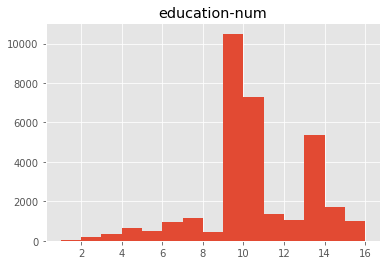

In [8]:
# plot a histogram of years of education
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data.hist(column='education-num', bins=15);
plt.show()

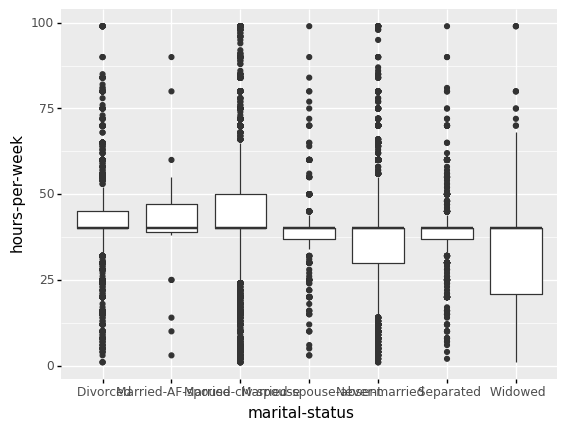

<ggplot: (-9223371892894145571)>

In [17]:
# Plot a boxplot of marital status and houra per week
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(data)
  + aes(x="marital-status", y="hours-per-week")
  + geom_boxplot()
)


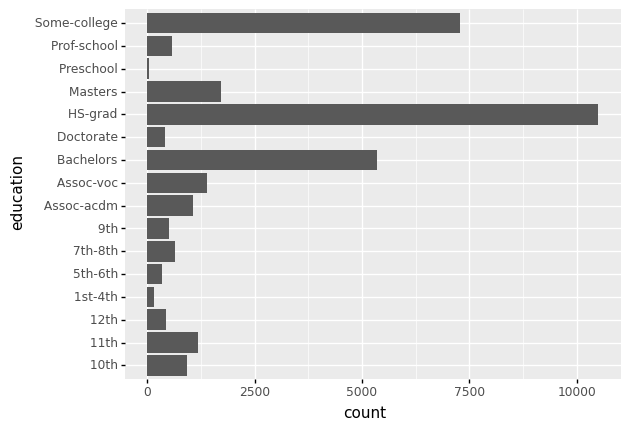

<ggplot: (-9223371892892632004)>

In [23]:
# Plot a bar chart about the count of education for each class
from plotnine import ggplot, aes, geom_bar, coord_flip
ggplot(data) + aes(x="education") + geom_bar() + coord_flip()

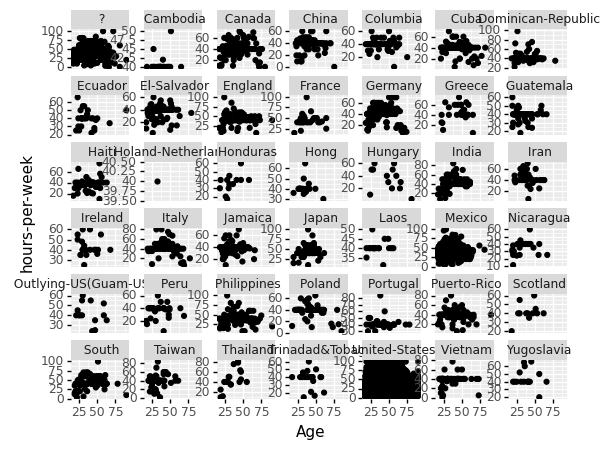

<ggplot: (82095464105)>

In [23]:
import pandas as pd

from plotnine import *
from plotnine.data import *

%matplotlib inline

(
    ggplot(data, aes(x='age', y='hours-per-week'))
    + geom_point()
    + facet_wrap('native-country',scales = 'free_y')
    + theme(subplots_adjust={'wspace': 0.25}) # add spaceing between facets to make y-axis ticks visible
    + labs(x='Age', y='hours-per-week')
)

In [11]:
# Group sample data by income level and calculate sample size for each group
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

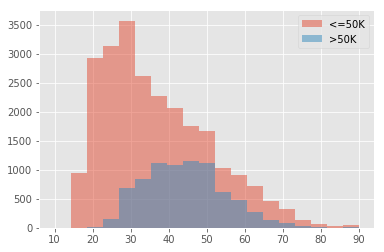

In [13]:
import numpy as np
data['income'].unique()
data = data.dropna() # pandas.DataFrame.dropna -> delete missing values
data['income'].unique() # To check whether ,issing values were delete
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']
bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best'); # Add variable annotation description
plt.show()

# Build model

In [24]:
# Y (dependent variable)
target = data['income']
# X (independent variables)
features_data = data.drop('income', axis=1)

In [26]:
# Filter numberic variables from X and save as numeric_features column
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')] # Extracts variables with numeric type in integer or floating
print(numeric_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [28]:
# Save numeric variables (numeric_features) to the numeric_data column
numeric_data = features_data[numeric_features]
print(numeric_data.head(5))

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40


In [30]:
# Save categorical variables to the categorical_data column
categorical_data = features_data.drop(numeric_features, 1)
print(categorical_data.head(5))

           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba  


In [31]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0]) # pd.factorize -> Categorical variables can be converted to numerical representations
                                                                                # apply -> the transformation function to each of the variable dimensions
categorical_data_encoded.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,1


In [35]:
print(categorical_data_encoded)

       workclass  education  marital-status  occupation  relationship  race  \
0              0          0               0           0             0     0   
1              1          0               1           1             1     0   
2              2          1               2           2             0     0   
3              2          2               1           2             1     1   
4              2          0               1           3             2     1   
...          ...        ...             ...         ...           ...   ...   
32556          2          6               1          10             2     0   
32557          2          1               1           9             1     0   
32558          2          1               6           0             4     0   
32559          2          1               0           0             3     0   
32560          6          1               1           1             2     0   

       sex  native-country  
0        0            

In [36]:
# Combine numeric_data and categorical_data_encoded
features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
features.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,1,0,1,1,1,0,0,0
2,38,215646,9,0,0,40,2,1,2,2,0,0,0,0
3,53,234721,7,0,0,40,2,2,1,2,1,1,0,0
4,28,338409,13,0,0,40,2,0,1,3,2,1,1,1
5,37,284582,14,0,0,40,2,3,1,1,2,0,1,0
6,49,160187,5,0,0,16,2,4,3,4,0,1,1,2
7,52,209642,9,0,0,45,1,1,1,1,1,0,0,0
8,31,45781,14,14084,0,50,2,3,0,3,0,0,1,0
9,42,159449,13,5178,0,40,2,0,1,1,1,0,0,0


In [39]:
X = features.values.astype(np.float32) # Change data type
y = (target.values == ' >50K').astype(np.int32) # income ">50K" ==1，“<=50K” ==0

In [42]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0) 

In [51]:
X_train

array([[3.60000e+01, 1.74308e+05, 7.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.50000e+01, 1.98202e+05, 9.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [3.80000e+01, 5.29630e+04, 1.30000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [2.30000e+01, 4.53170e+04, 1.00000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.50000e+01, 2.15862e+05, 1.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.50000e+01, 1.86925e+05, 1.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]], dtype=float32)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8) # max_depth=> the maximum depth of decisiontree

# Cross validation is used to evaluate the performance of the classifier. 
# The scoring standard selected here is the AUC value under the ROC curve, which corresponds to a classifier with a larger AUC
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc') 
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Decision Tree: 0.8962 +/-0.0038
